In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer
import joblib

# Load your data
df = pd.read_csv("metro_systems_final.csv")

# Fill missing values for numeric columns only
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='mean')
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

# Features and target
X = df[['Population', 'Population Density', 'Stations', 'System length', 'Lines']]
y = df['Annual Average Ridership']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Train XGBoost model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
xgb_model.fit(X_train, y_train)

# Save the model
joblib.dump(xgb_model, "xgboost_model.pkl")

# Evaluate
y_pred = xgb_model.predict(X_test)
print(f"✅ MSE: {mean_squared_error(y_test, y_pred):.2f}")
print(f"✅ R² Score: {r2_score(y_test, y_pred):.2f}")


C:\Users\karti\AppData\Local\Temp\ipykernel_22704\3248820166.py:9: DtypeWarning: Columns (0,1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("metro_systems_final.csv")


✅ MSE: 16.16
✅ R² Score: 0.83


In [4]:
import pandas as pd
import joblib
from IPython.display import display
import ipywidgets as widgets

# Load the saved model
xgb_model = joblib.load("xgboost_model.pkl")

# Define input widgets
population_widget = widgets.FloatSlider(description='Population (millions)', min=0.1, max=50.0, step=0.1, value=5.0)
density_widget = widgets.FloatSlider(description='Density (/sq km)', min=10.0, max=50000.0, step=100.0, value=10000.0)
stations_widget = widgets.IntSlider(description='Stations', min=1, max=300, step=1, value=50)
length_widget = widgets.FloatSlider(description='System Length (km)', min=1.0, max=1000.0, step=1.0, value=100.0)
lines_widget = widgets.IntSlider(description='Lines', min=1, max=20, step=1, value=5)

# Predict button
predict_button = widgets.Button(description="Predict Ridership", button_style='info')
output = widgets.Output()

# Prediction function
def on_click(b):
    with output:
        output.clear_output()
        input_data = pd.DataFrame([[
            population_widget.value,
            density_widget.value,
            stations_widget.value,
            length_widget.value,
            lines_widget.value
        ]], columns=['Population', 'Population Density', 'Stations', 'System length', 'Lines'])

        prediction = xgb_model.predict(input_data)[0]
        print(f"🎯 Predicted Annual Average Ridership: {prediction:.2f} million")

predict_button.on_click(on_click)

# Display all
display(widgets.VBox([
    population_widget,
    density_widget,
    stations_widget,
    length_widget,
    lines_widget,
    predict_button,
    output
]))


C:\Users\karti\AppData\Local\Temp\ipykernel_22704\3056381672.py:25: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  plt.tight_layout()
C:\Users\karti\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


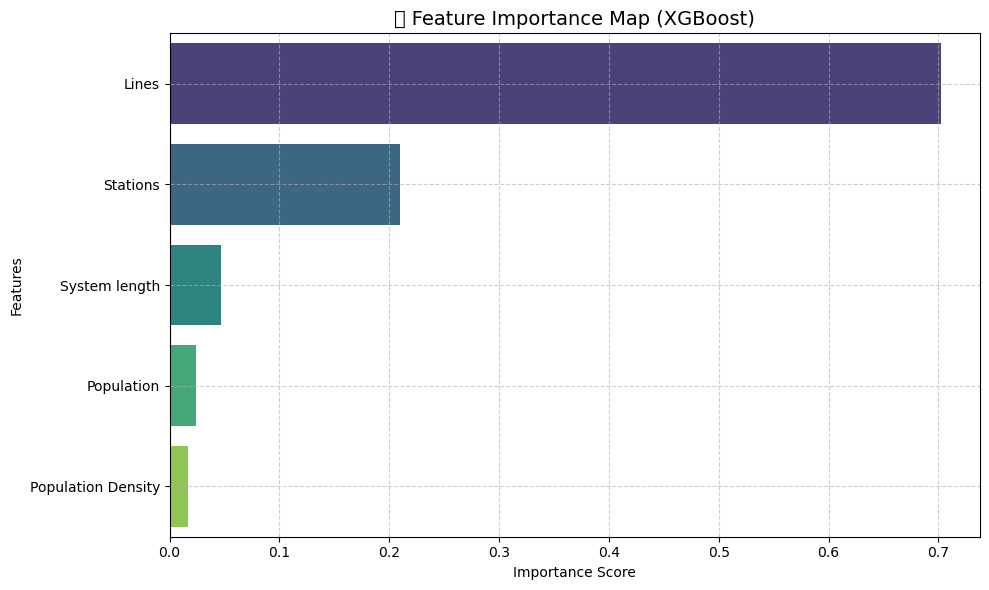

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import joblib

# Load trained model (if not already loaded)
xgb_model = joblib.load("xgboost_model.pkl")

# Feature names
features = ['Population', 'Population Density', 'Stations', 'System length', 'Lines']

# Get feature importances
importances = xgb_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort by importance
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title("🔍 Feature Importance Map (XGBoost)", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()
